<a href="https://colab.research.google.com/github/khaoula-oueslati/ConvMsa/blob/master/test_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.express as px

#  **Data**: **`Orders _ customers - anonymized`**

In [105]:
orders_customers_anonymised = pd.read_excel("/Orders _ customers - anonymized.xlsx")
orders_customers_anonymised.head()

,Name,Customer id,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing City,Shipping Province,Shipping Country,Notes,Note Attributes,Cancelled at,,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Payment Terms Name,Next Payment Due At
0,#14442,1,paid,2021-09-23 09:43:21 +0200,unfulfilled,NaN,yes,EUR,105.00,20.00,9.55,125.00,NaN,0.00,TNT express - 1/2 giorni,2021-09-23 09:43:20 +0200,1,Box Vitamina C,105.00,145.00,DPR-BOX-VITC,true,true,pending,PADENGHE SUL GARDA,BS,IT,NaN,date: 2021/09/28,NaN,PayPal Express Checkout,c23025176051900.1,0.00,Depuravita,4017620549820,NaN,Low,web,0.0,VAT 10%,9.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#14441,,paid,2021-09-22 14:21:46 +0200,fulfilled,2021-09-22 15:02:22 +0200,no,EUR,2970.00,0.00,0.00,2970.00,Sconto personalizzato,5730.00,NaN,2021-09-22 14:21:45 +0200,60,Collagen Chocolate,55.00,NaN,CLGN-CHCLT,true,true,fulfilled,London,ENG,GB,NaN,date: 2021/08/31,NaN,manual,c23012107649212.1,0.00,Depuravita,4016061481148,NaN,Low,shopify_draft_order,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#14441,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-22 14:21:45 +0200,60,Probiotic Chocolate,55.00,NaN,PRB-CHCLT,true,true,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depuravita,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#14441,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-22 14:21:45 +0200,60,Strong Bite,35.00,NaN,DPR-WP-CHC,true,true,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depuravita,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#14440,,paid,2021-09-22 11:33:54 +0200,fulfilled,2021-09-22 12:16:47 +0200,no,EUR,561.00,0.00,51.00,561.00,Sconto personalizzato,165.00,NaN,2021-09-22 11:33:52 +0200,15,Black Panther,4.90,NaN,DPR-BLPHTR-250,true,true,fulfilled,NaN,AG,IT,Fascia oraria di consegna 19-22,date: 2021/09/22,NaN,Stripe,c23010364096700.1,0.00,Depuravita,4015897772220,"compra_ora_paga_dopo_con_klarna, Klarna Payments",Low,shopify_draft_order,0.0,VAT 10%,51.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
orders_customers_anonymised.describe()

,Customer id,Lineitem discount,Tax 1 Value,Tax 2 Value
count,7922.000000,15687.000000,3802.000000,8.000000
mean,10528.537869,0.001211,16.939989,23.432500
std,8759.622879,0.151699,26.320643,20.663362
min,1.000000,0.000000,0.040000,7.420000
25%,2680.000000,0.000000,7.090000,8.110000
50%,8428.000000,0.000000,10.730000,14.755000
75%,16017.000000,0.000000,16.270000,32.790000
max,28792.000000,19.000000,405.000000,66.450000


In [147]:
orders_customers_anonymised.shape

(15876, 45)

# Missing values

In [107]:
import plotly.express as px

In [148]:
#count  missing values per column
mv = orders_customers_anonymised.isnull().sum()
mv_data = pd.DataFrame(mv,columns=['count NAN'])
mv_data['column name'] = mv_data.index
mv_data = mv_data.sort_values(by=['count NAN'])

#plot
fig = px.bar(mv_data, y='count NAN', x='column name', text='count NAN')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',marker_color="#2f6358")
fig.show()

# Filling empty string with NaN




In [149]:
orders_customers_anonymised = orders_customers_anonymised.replace(' ', np.nan)

Number of missing values after filling empty sting

In [150]:
mv = orders_customers_anonymised.isnull().sum()
mv_data = pd.DataFrame(mv,columns=['count NAN'])
mv_data['column name'] = mv_data.index
mv_data = mv_data.sort_values(by=['count NAN'])

#plot
fig = px.bar(mv_data, y='count NAN', x='column name', text='count NAN')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',marker_color="#2f6358")
fig.show()

# Keep only rows with valid Name ID

In [151]:
print('{:,} rows; {:,} columns'
      .format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))
print('{:,} transactions don\'t have a Name id'
      .format(orders_customers_anonymised[orders_customers_anonymised["Name"].isnull()].shape[0]))
print("-------------------------------")
orders_customers_anonymised['Name'] = orders_customers_anonymised['Name'].astype(str)
filter = orders_customers_anonymised['Name'].str.contains("^#\d{5}")
orders_customers_anonymised = orders_customers_anonymised[filter]

###############

print('{:,} rows; {:,} columns'
      .format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))
print('{:,} transactions don\'t have a Name id'
      .format(orders_customers_anonymised[orders_customers_anonymised["Name"].isnull()].shape[0]))
print('{:} number of unique Name id'.format(orders_customers_anonymised["Name"].nunique()))

15,876 rows; 45 columns
0 transactions don't have a Name id
-------------------------------
15,876 rows; 45 columns
0 transactions don't have a Name id
4436 number of unique Name id


# Customer id



In [152]:
print('{:,} rows; {:,} columns'
      .format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(orders_customers_anonymised[orders_customers_anonymised["Customer id"].isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(orders_customers_anonymised['Created at'].min(),
                                    orders_customers_anonymised['Created at'].max()))
#######################################
orders_customers_anonymised = orders_customers_anonymised[orders_customers_anonymised['Customer id'].notna()]
orders_customers_anonymised['Customer id'] = orders_customers_anonymised['Customer id'].astype(int)
#######################################
print("-------------------------------")
print("Keeping only clients with ID")
print("-------------------------------")

print('{:,} rows; {:,} columns'
      .format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(orders_customers_anonymised[orders_customers_anonymised["Customer id"].isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(orders_customers_anonymised['Created at'].min(),
                                    orders_customers_anonymised['Created at'].max()))
print("-------------------------------")
print('number of clients having id; {} '.format(orders_customers_anonymised["Customer id"].nunique()))

15,876 rows; 45 columns
7,954 transactions don't have a customer id
Transactions timeframe from 2020-03-12 10:41:22 +0100 to 2021-09-23 09:43:20 +0200
-------------------------------
Keeping only clients with ID
-------------------------------
7,922 rows; 45 columns
0 transactions don't have a customer id
Transactions timeframe from 2020-03-12 11:46:19 +0100 to 2021-09-23 09:43:20 +0200
-------------------------------
number of clients having id; 1298 


## Drop the columns where all elements are NaN


In [153]:
x = orders_customers_anonymised.shape[1]
print("number of columns before elimination %s"% x)
orders_customers_anonymised = orders_customers_anonymised.dropna(axis=1, how='all')
x = orders_customers_anonymised.shape[1]
print("-------------------------------")
print("number of columns after elimination %s"% x)

number of columns before elimination 45
-------------------------------
number of columns after elimination 44


Missing values after cleaning

In [154]:
mv = orders_customers_anonymised.isnull().sum()
mv_data = pd.DataFrame(mv,columns=['count NAN'])
mv_data['column name'] = mv_data.index
mv_data = mv_data.sort_values(by=['count NAN'])
#plot

mv_data_fig = px.bar(mv_data, y='count NAN', x='column name', text='count NAN')
mv_data_fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',marker_color="#2f6358")
mv_data_fig.show()

In [155]:
orders_customers_anonymised.shape

(7922, 44)


 **B2C clients**






Finding the payment type column

In [115]:
orders_customers_anonymised[" "].value_counts()

PayPal Express Checkout                      1391
Stripe                                       1250
manual                                       1250
Compra ora, paga dopo con Klarna               41
Stripe + PayPal Express Checkout               14
manual + Stripe                                 4
PayPal Express Checkout + Stripe                2
Stripe + Compra ora, paga dopo con Klarna       1
Name:  , dtype: int64

* **Rename the column** 


In [156]:
orders_customers_anonymised = orders_customers_anonymised.rename(columns ={" " : "paiment type"})

## Clients B2C
Keeping client with  paiment type  different of manual 
keeping client with Financial Status = paid

In [164]:
customers_B2C["Financial Status"].value_counts()

paid    2617
Name: Financial Status, dtype: int64

In [163]:
customers_B2C = orders_customers_anonymised[orders_customers_anonymised["paiment type"] != "manual"]
customers_B2C = customers_B2C.loc[customers_B2C['Financial Status'].isin(['paid', np.nan])]

In [158]:
customers_B2C.shape

(7767, 44)

# Total revenu per command, including taxes


In [172]:
customers_B2C["Total"] = customers_B2C["Total"].astype(float)
customers_B2C["Taxes"] = customers_B2C["Taxes"].astype(float)

In [173]:
customers_B2C["Total Revenu"]  = customers_B2C["Total"] + customers_B2C["Taxes"]
customers_B2C.head()

,Name,Customer id,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing City,Shipping Province,Shipping Country,Notes,Note Attributes,Cancelled at,paiment type,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Phone,Total Revenu
0,#14442,1,paid,2021-09-23 09:43:21 +0200,unfulfilled,NaN,yes,EUR,105.00,20.00,9.55,125.0,NaN,0.00,TNT express - 1/2 giorni,2021-09-23 09:43:20 +0200,1,Box Vitamina C,105.00,145.00,DPR-BOX-VITC,true,true,pending,PADENGHE SUL GARDA,BS,IT,NaN,date: 2021/09/28,NaN,PayPal Express Checkout,c23025176051900.1,0.00,Depuravita,4.017621e+12,NaN,Low,web,0.0,VAT 10%,9.55,NaN,NaN,NaN,134.55
85,#14426,5362,paid,2021-09-21 19:30:02 +0200,fulfilled,2021-09-22 15:09:48 +0200,yes,EUR,94.00,0.00,8.55,94.0,NaN,0.00,Stef Consegna Refrigerata - 3/5 giorni,2021-09-21 19:30:01 +0200,1,Collagen Chocolate,55.00,NaN,CLGN-CHCLT,true,true,fulfilled,Roma,RM,IT,NaN,date: 2021/09/24,NaN,Stripe,c22998476423356.2,0.00,Depuravita,4.014586e+12,NaN,Low,web,0.0,VAT 10%,8.55,NaN,NaN,NaN,102.55
86,#14426,5362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-21 19:30:01 +0200,1,Hello Wrinkles,39.00,NaN,DPR-HW-30,true,true,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depuravita,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
87,#14425,7447,paid,2021-09-21 19:22:39 +0200,fulfilled,2021-09-22 15:12:40 +0200,yes,EUR,90.90,0.00,8.26,90.9,DPQ4LZ7L,50.00,Stef Consegna Refrigerata - 3/5 giorni,2021-09-21 19:22:38 +0200,3,Genius,4.50,NaN,DPR-GNS-250,true,true,fulfilled,DUE CARRARE,PD,IT,NaN,date: 2021/09/23,NaN,PayPal Express Checkout,c22998340698300.1,0.00,Depuravita,4.014575e+12,NaN,Low,web,0.0,VAT 10%,8.26,NaN,NaN,NaN,99.16
88,#14425,7447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-21 19:22:38 +0200,8,Elixir Red,4.90,NaN,DPR-ELXRD-250,true,true,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depuravita,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN





---



**texte en gras**# * Récense 

In [ ]:
from datetime import timedelta

In [ ]:
customers_B2C['Created at'] = pd.to_datetime(customers_B2C['Created at'])

In [ ]:
customers_B2C['Created at']

0        2021-09-23 09:43:20+02:00
85       2021-09-21 19:30:01+02:00
86       2021-09-21 19:30:01+02:00
87       2021-09-21 19:22:38+02:00
88       2021-09-21 19:22:38+02:00
                   ...            
16254    2020-03-12 11:46:19+01:00
16255    2020-03-12 11:46:19+01:00
16256    2020-03-12 11:46:19+01:00
16257    2020-03-12 11:46:19+01:00
16258    2020-03-12 11:46:19+01:00
Name: Created at, Length: 7767, dtype: object

In [ ]:
# Create snapshot date
snapshot_date = customers_B2C['Created at'].max() + timedelta(days=1)
print(snapshot_date)

2021-09-24 09:43:20+02:00


In [ ]:
customers_B2C["Total"] = customers_B2C["Total"].astype('float')

In [ ]:
customers_B2C["Total"] = customers_B2C["Total"].fillna(0).astype(float)

In [ ]:
# Grouping by CustomerID
data_process = customers_B2C.groupby(['Customer id']).agg({
        'Created at': lambda x: (snapshot_date - x.max()).days,
        'Name': 'count',
        'Total': 'sum'})

In [ ]:
# Rename the columns 
data_process.rename(columns={'Created at': 'Recency',
                         'Name': 'Frequency',
                         'Total': 'MonetaryValue'}, inplace=True)

In [ ]:
data_process

,Recency,Frequency,MonetaryValue
Customer id,,,
1,1,1,125.00
6,3,4,28.40
8,4,1,51.65
9,2,1,90.75
10,4,1,140.00
...,...,...,...
28787,287,2,348.00
28788,559,1,101.15
28789,178,10,362.73


# the distribution of  Recency, Frequency, and Monetary.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

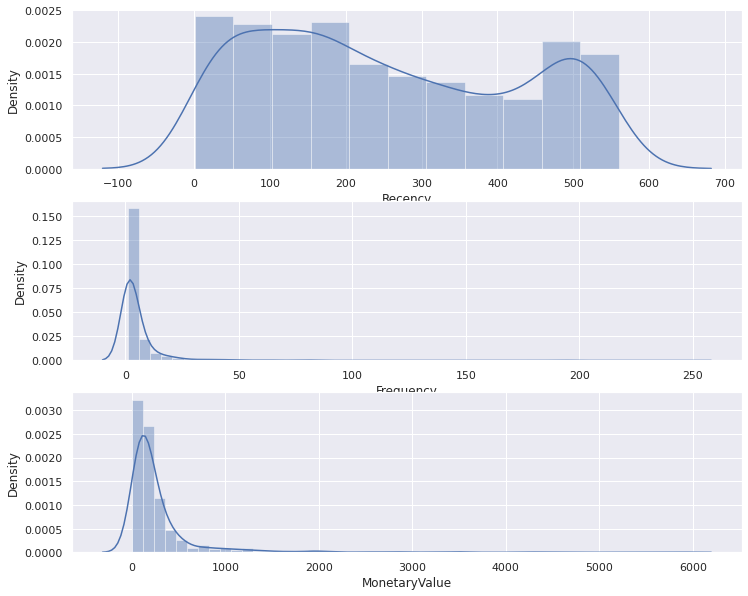

In [ ]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

# Outliers 

Text(0.5, 0, 'Attributes')

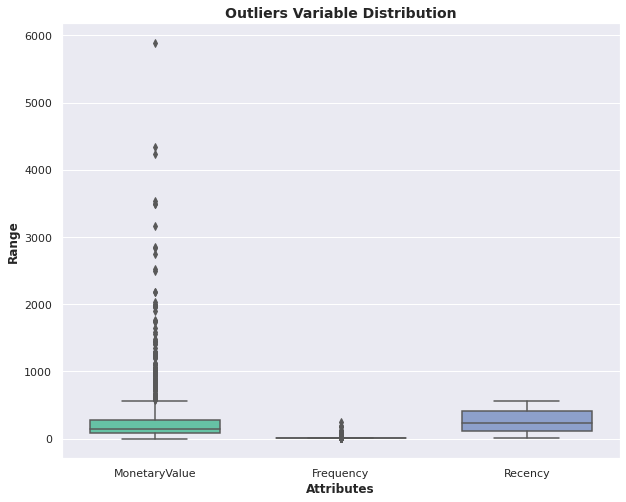

In [ ]:
attributes = ['MonetaryValue','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data_process[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
rfm = data_process

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = rfm.MonetaryValue.quantile(0.05)
Q3 = rfm.MonetaryValue.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.MonetaryValue >= Q1 - 1.5*IQR) & (rfm.MonetaryValue <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
rfm_df = rfm[['MonetaryValue', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(1268, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.391340,-0.526560,-1.512618
1,-0.740969,-0.047251,-1.500828
2,-0.656819,-0.526560,-1.494933
3,-0.515302,-0.526560,-1.506723
4,-0.337049,-0.526560,-1.494933


# K-Means Clustering


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 3, 1, 2], dtype=int32)

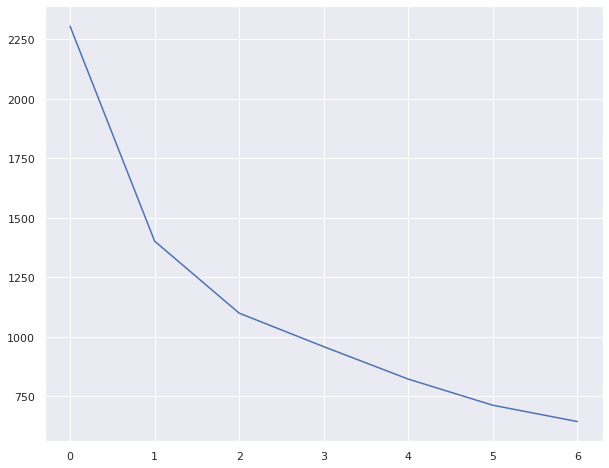

In [ ]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5963474001258307
For n_clusters=3, the silhouette score is 0.45569211683553024
For n_clusters=4, the silhouette score is 0.4673493481190384
For n_clusters=5, the silhouette score is 0.36364957864179404
For n_clusters=6, the silhouette score is 0.3723756786680876
For n_clusters=7, the silhouette score is 0.379536289836113
For n_clusters=8, the silhouette score is 0.3897696446848829


In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,Recency,Frequency,MonetaryValue,Cluster_Id
Customer id,,,,
1,1,1,125.00,1
6,3,4,28.40,1
8,4,1,51.65,1
9,2,1,90.75,1
10,4,1,140.00,1


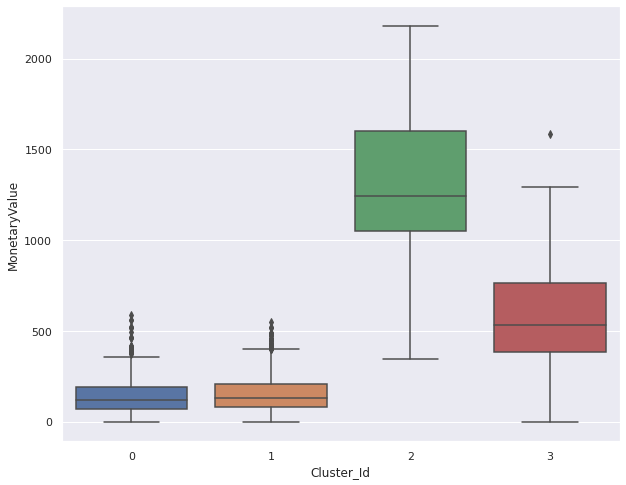

In [ ]:
sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=rfm)


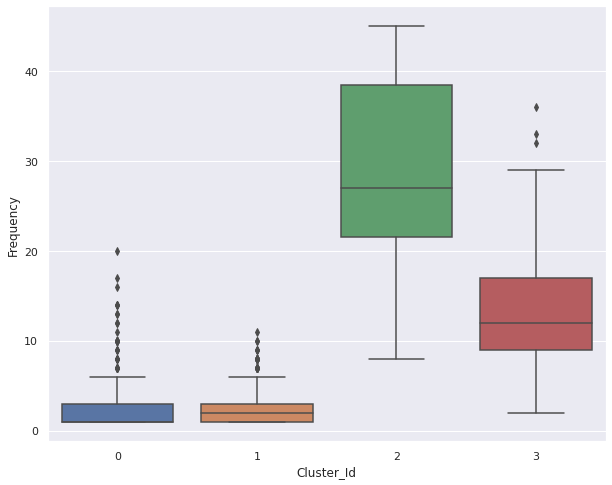

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)


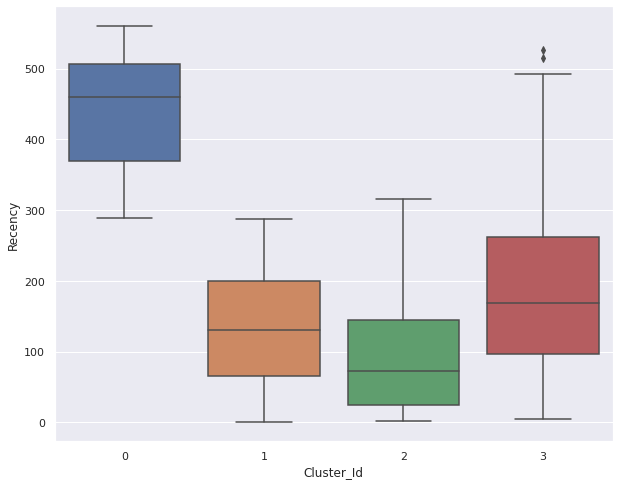

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)


In [ ]:
rfm["Cluster_Id"].value_counts()

1    608
0    490
3    135
2     35
Name: Cluster_Id, dtype: int64

------------------------

In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,Recency,Frequency,MonetaryValue,Cluster_Id
Customer id,,,,
1,1,1,125.00,0
6,3,4,28.40,0
8,4,1,51.65,0
9,2,1,90.75,0
10,4,1,140.00,0


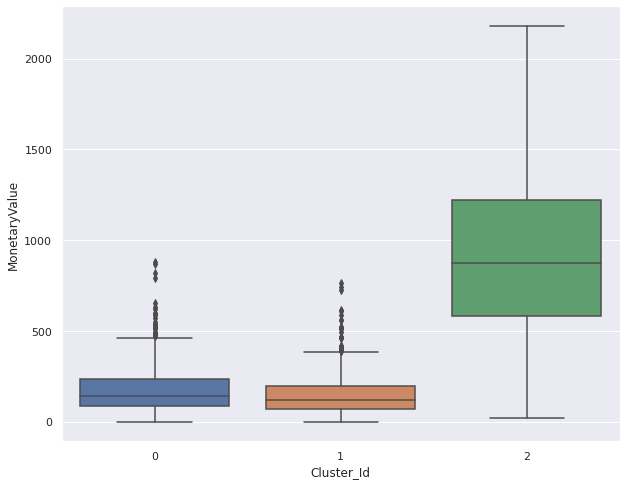

In [ ]:
sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=rfm)


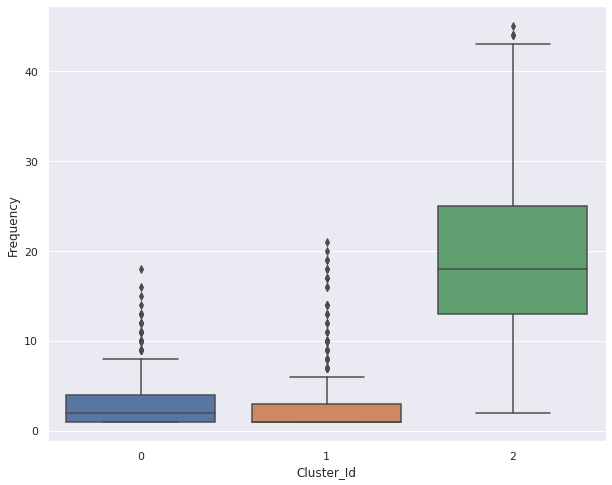

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

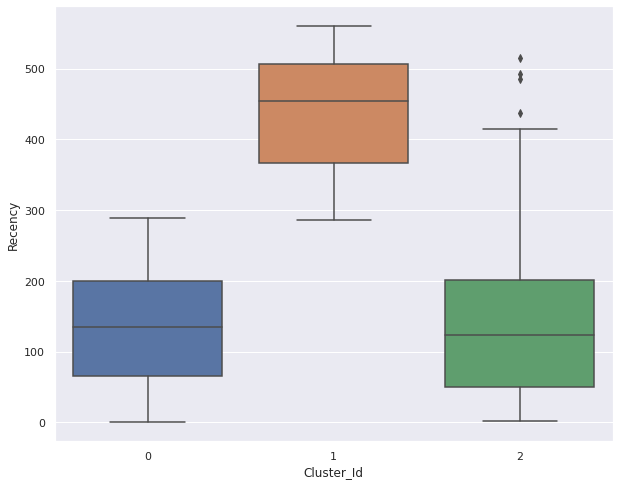

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
rfm

,Recency,Frequency,MonetaryValue,Cluster_Id
Customer id,,,,
1,1,1,125.00,0
6,3,4,28.40,0
8,4,1,51.65,0
9,2,1,90.75,0
10,4,1,140.00,0
...,...,...,...,...
28787,287,2,348.00,0
28788,559,1,101.15,1
28789,178,10,362.73,0


In [ ]:
rfm1 = rfm[["Recency", "Frequency", "MonetaryValue"]]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
rfm["Cluster_Id"].value_counts()

0    657
1    508
2    103
Name: Cluster_Id, dtype: int64

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

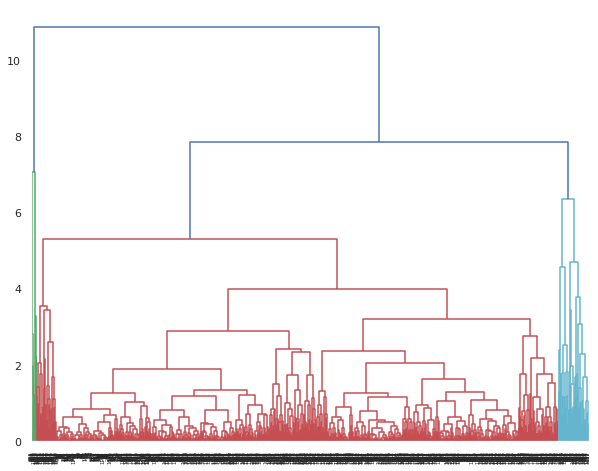

In [ ]:
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

# RFM Quartiles

In [ ]:
data_process

,Recency,Frequency,MonetaryValue
Customer id,,,
1,1,1,125.00
6,3,4,28.40
8,4,1,51.65
9,2,1,90.75
10,4,1,140.00
...,...,...,...
28787,287,2,348.00
28788,559,1,101.15
28789,178,10,362.73


In [ ]:
quantiles = data_process.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,MonetaryValue
0.25,108.0,1.0,88.9
0.50,226.0,2.0,145.0
0.75,407.0,5.0,279.0


In [ ]:
quantiles.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'MonetaryValue': {0.25: 88.9, 0.5: 145.0, 0.75: 279.0},
 'Recency': {0.25: 108.0, 0.5: 226.0, 0.75: 407.0}}

# Creation of RFM Segments

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
#create rfm segmentation table
rfm_segmentation = data_process
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))

In [ ]:
rfm_segmentation

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile
Customer id,,,,,,
1,1,1,125.00,4,1,2
6,3,4,28.40,4,3,1
8,4,1,51.65,4,1,1
9,2,1,90.75,4,1,2
10,4,1,140.00,4,1,2
...,...,...,...,...,...,...
28787,287,2,348.00,2,2,4
28788,559,1,101.15,1,1,2
28789,178,10,362.73,3,4,4


In [ ]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)

In [ ]:
rfm_segmentation

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer id,,,,,,,
1,1,1,125.00,4,1,2,412
6,3,4,28.40,4,3,1,431
8,4,1,51.65,4,1,1,411
9,2,1,90.75,4,1,2,412
10,4,1,140.00,4,1,2,412
...,...,...,...,...,...,...,...
28787,287,2,348.00,2,2,4,224
28788,559,1,101.15,1,1,2,112
28789,178,10,362.73,3,4,4,344


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most

In [ ]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('MonetaryValue', ascending=False).head(10)

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer id,,,,,,,
5401,3,193,5882.65,4,4,4,444
13219,12,64,4335.86,4,4,4,444
12290,25,191,4231.28,4,4,4,444
7609,52,76,3529.34,4,4,4,444
15956,53,115,3494.27,4,4,4,444
24505,9,120,3484.04,4,4,4,444
7044,25,247,2840.10,4,4,4,444
20487,73,107,2746.39,4,4,4,444
16017,6,80,2184.05,4,4,4,444


In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  83
Loyal Customers:  290
Big Spenders:  315
Almost Lost:  34
Lost Customers:  10
Lost Cheap Customers:  67


Best Customers - Champions: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".
At Risk: Send them personalized emails to encourage them to shop.

In [ ]:
#!pip install squarify

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import datetime as dt
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import squarify
from sklearn.cluster import KMeans

In [ ]:
rfm_table = data_process

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

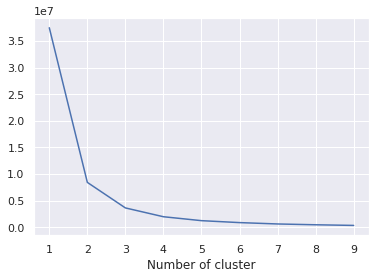

In [ ]:
#Finding Optimum Clusters
sse={}
tx_recency = rfm_table[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()



In [ ]:
rfm_table

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer id,,,,,,,
1,1,1,125.00,4,1,2,412
6,3,4,28.40,4,3,1,431
8,4,1,51.65,4,1,1,411
9,2,1,90.75,4,1,2,412
10,4,1,140.00,4,1,2,412
...,...,...,...,...,...,...,...
28787,287,2,348.00,2,2,4,224
28788,559,1,101.15,1,1,2,112
28789,178,10,362.73,3,4,4,344


******************************

In [ ]:
from pandas import json_normalize

In [ ]:
customer2_events  = pd.read_json("/customer1_events - JSON.txt")
customer2_events.head()

,statistic_id,timestamp,event_name,event_properties
0,H9AiMX,2021-09-22 14:40:48+00:00,Opened Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ..."
1,H9AiMX,2021-09-22 12:10:33+00:00,Opened Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ..."
2,P9SZW3,2021-09-22 10:28:24+00:00,Received Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ..."
3,P9SZW3,2021-09-20 05:45:28+00:00,Received Email,{'Subject': 'Scopri Il duo di Omega 100% plant...
4,H9AiMX,2021-09-19 16:04:56+00:00,Opened Email,{'Subject': 'Piccolo momento autocelebrativo e...


In [ ]:
customer1_events  = pd.read_json("/customer2_events - JSON.txt")
customer1_events.head()   

,statistic_id,timestamp,event_name,event_properties
0,P9SZW3,2021-09-22 10:28:38+00:00,Received Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ..."
1,P9SZW3,2021-09-20 05:45:43+00:00,Received Email,{'Subject': 'Scopri Il duo di Omega 100% plant...
2,P9SZW3,2021-09-19 06:40:09+00:00,Received Email,{'Subject': 'Piccolo momento autocelebrativo e...
3,H9AiMX,2021-09-18 16:38:19+00:00,Opened Email,"{'Subject': 'Ok il vaccino, ma se hai questi a..."
4,H9AiMX,2021-09-18 08:10:30+00:00,Opened Email,"{'Subject': 'Ok il vaccino, ma se hai questi a..."


In [ ]:
l1 = list(customer1_events["event_properties"])
l2 = list(customer2_events["event_properties"])

result1 = json_normalize(l1,max_level=3)
result2 = json_normalize(l2,max_level=8)

customer_event1 =  pd.concat([customer1_events, result1], axis=1)
customer_event2 =  pd.concat([customer2_events, result2], axis=1)

In [ ]:
customer_event1.head()

,statistic_id,timestamp,event_name,event_properties,Subject,Campaign Name,$message,Email Domain,$_cohort$message_send_cohort,$ESP,$event_id,Client Type,Client OS Family,Client OS,Client Name,$message_interaction,page,browser,os,$is_session_activity,$attribution.$attributed_event_id,$attribution.$send_ts,$attribution.$message,URL,Items,Collections,Item Count,tags,Discount Codes,Total Discounts,Source Name,$currency_code,FulfillmentStatus,FulfillmentHours,HasPartialFulfillments,$value,$extra.id,$extra.admin_graphql_api_id,$extra.app_id,$extra.browser_ip,...,$extra.customer.default_address.default,$extra.discount_applications,$extra.fulfillments,$extra.line_items,$extra.refunds,$extra.shipping_address.first_name,$extra.shipping_address.address1,$extra.shipping_address.phone,$extra.shipping_address.city,$extra.shipping_address.zip,$extra.shipping_address.province,$extra.shipping_address.country,$extra.shipping_address.last_name,$extra.shipping_address.address2,$extra.shipping_address.company,$extra.shipping_address.latitude,$extra.shipping_address.longitude,$extra.shipping_address.name,$extra.shipping_address.country_code,$extra.shipping_address.province_code,$extra.shipping_lines,$extra.webhook_id,$extra.full_landing_site,$attribution.$flow,$flow,ProductID,Name,Variant Name,SKU,Tags,Vendor,Variant Option: Size,Quantity,Variant Option: Durata:,$extra.webhook_topic,$extra.responsive_checkout_url,$extra.checkout_url,ShippingRate,Variant Option: Title,$session_end
0,P9SZW3,2021-09-22 10:28:38+00:00,Received Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ...",Tempo di depurarsi ✨,equinox,X8RJvZ,gmail.com,1632306516:X8RJvZ,0.0,X8RJvZ:300607106468994405154528774642437475416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P9SZW3,2021-09-20 05:45:43+00:00,Received Email,{'Subject': 'Scopri Il duo di Omega 100% plant...,"Scopri Il duo di Omega 100% plant based, migli...",omega,SEqPaS,gmail.com,1632116740:SEqPaS,0.0,SEqPaS:286836699920635188915395159446882634840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P9SZW3,2021-09-19 06:40:09+00:00,Received Email,{'Subject': 'Piccolo momento autocelebrativo e...,Piccolo momento autocelebrativo e una super ne...,Paris events,WaN7SE,gmail.com,1632033606:WaN7SE,0.0,WaN7SE:283353057025782801986169742368876547160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H9AiMX,2021-09-18 16:38:19+00:00,Opened Email,"{'Subject': 'Ok il vaccino, ma se hai questi a...","Ok il vaccino, ma se hai questi abitudini...",Vaccino,VK6rNW,gmail.com,1631869739:VK6rNW,0.0,VK6rNW:275132098860562190383303833966646152280...,Other,Linux,Linux,Gmail image proxy,VK6rNW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H9AiMX,2021-09-18 08:10:30+00:00,Opened Email,"{'Subject': 'Ok il vaccino, ma se hai questi a...","Ok il vaccino, ma se hai questi abitudini...",Vaccino,VK6rNW,gmail.com,1631869739:VK6rNW,0.0,VK6rNW:275132098860562190383303833966646152280...,Other,Linux,Linux,Gmail image proxy,VK6rNW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
customer_event2.head()

,statistic_id,timestamp,event_name,event_properties,Subject,Campaign Name,$message,Email Domain,$_cohort$message_send_cohort,Client Type,Client OS Family,Client OS,Client Name,$message_interaction,$ESP,$event_id,$flow,URL,page,browser,os,$is_session_activity,$attribution.$attributed_event_id,$attribution.$send_ts,$attribution.$message,Client Canonical,Items,Collections,Item Count,tags,$currency_code,ShippingRate,Discount Codes,Total Discounts,Source Name,FulfillmentStatus,FulfillmentHours,$value,$extra.current_subtotal_price,$extra.source_name,...,$extra.shipping_address.city,$extra.shipping_address.first_name,$extra.shipping_address.last_name,$extra.shipping_address.name,$extra.shipping_address.zip,$extra.shipping_address.province_code,$extra.shipping_address.address1,$extra.shipping_address.address2,$extra.shipping_address.longitude,$extra.shipping_address.phone,$extra.shipping_address.country_code,$extra.shipping_address.country,$extra.shipping_address.latitude,$extra.shipping_address.company,$extra.total_discounts,$extra.order_status_url,$extra.client_details.browser_width,$extra.client_details.user_agent,$extra.client_details.accept_language,$extra.client_details.browser_height,$extra.client_details.session_hash,$extra.client_details.browser_ip,$extra.subtotal_price,$extra.total_weight,$extra.full_landing_site,$attribution.$flow,ProductID,Name,Variant Name,SKU,Tags,Vendor,Variant Option: Title,Quantity,$extra.webhook_topic,$extra.responsive_checkout_url,$extra.checkout_url,$session_end,List,Variant Option: Size
0,H9AiMX,2021-09-22 14:40:48+00:00,Opened Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ...",Tempo di depurarsi ✨,equinox,X8RJvZ,gmail.com,1632306503:X8RJvZ,Other,Linux,Linux,Gmail image proxy,X8RJvZ,0.0,X8RJvZ:300606500611235658575139196811849256024...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H9AiMX,2021-09-22 12:10:33+00:00,Opened Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ...",Tempo di depurarsi ✨,equinox,X8RJvZ,gmail.com,1632306503:X8RJvZ,Other,Linux,Linux,Gmail image proxy,X8RJvZ,0.0,X8RJvZ:300606500611235658575139196811849256024...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P9SZW3,2021-09-22 10:28:24+00:00,Received Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ...",Tempo di depurarsi ✨,equinox,X8RJvZ,gmail.com,1632306503:X8RJvZ,NaN,NaN,NaN,NaN,NaN,0.0,X8RJvZ:300606500611235658575139196811849256024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P9SZW3,2021-09-20 05:45:28+00:00,Received Email,{'Subject': 'Scopri Il duo di Omega 100% plant...,"Scopri Il duo di Omega 100% plant based, migli...",omega,SEqPaS,gmail.com,1632116726:SEqPaS,NaN,NaN,NaN,NaN,NaN,0.0,SEqPaS:286836498443417915141184659064616930392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H9AiMX,2021-09-19 16:04:56+00:00,Opened Email,{'Subject': 'Piccolo momento autocelebrativo e...,Piccolo momento autocelebrativo e una super ne...,Paris events,WaN7SE,gmail.com,1632033598:WaN7SE,Other,Linux,Linux,Gmail image proxy,WaN7SE,0.0,WaN7SE:283352656448193129865678869410663648344...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Na

In [ ]:
customer_event1.columns.tolist()


['statistic_id',
 'timestamp',
 'event_name',
 'event_properties',
 'Subject',
 'Campaign Name',
 '$message',
 'Email Domain',
 '$_cohort$message_send_cohort',
 '$ESP',
 '$event_id',
 'Client Type',
 'Client OS Family',
 'Client OS',
 'Client Name',
 '$message_interaction',
 'page',
 'browser',
 'os',
 '$is_session_activity',
 '$attribution.$attributed_event_id',
 '$attribution.$send_ts',
 '$attribution.$message',
 'URL',
 'Items',
 'Collections',
 'Item Count',
 'tags',
 'Discount Codes',
 'Total Discounts',
 'Source Name',
 '$currency_code',
 'FulfillmentStatus',
 'FulfillmentHours',
 'HasPartialFulfillments',
 '$value',
 '$extra.id',
 '$extra.admin_graphql_api_id',
 '$extra.app_id',
 '$extra.browser_ip',
 '$extra.buyer_accepts_marketing',
 '$extra.cancel_reason',
 '$extra.cancelled_at',
 '$extra.cart_token',
 '$extra.checkout_id',
 '$extra.checkout_token',
 '$extra.client_details.accept_language',
 '$extra.client_details.browser_height',
 '$extra.client_details.browser_ip',
 '$extra

In [ ]:
customer_event2.columns.tolist()


['statistic_id',
 'timestamp',
 'event_name',
 'event_properties',
 'Subject',
 'Campaign Name',
 '$message',
 'Email Domain',
 '$_cohort$message_send_cohort',
 'Client Type',
 'Client OS Family',
 'Client OS',
 'Client Name',
 '$message_interaction',
 '$ESP',
 '$event_id',
 '$flow',
 'URL',
 'page',
 'browser',
 'os',
 '$is_session_activity',
 '$attribution.$attributed_event_id',
 '$attribution.$send_ts',
 '$attribution.$message',
 'Client Canonical',
 'Items',
 'Collections',
 'Item Count',
 'tags',
 '$currency_code',
 'ShippingRate',
 'Discount Codes',
 'Total Discounts',
 'Source Name',
 'FulfillmentStatus',
 'FulfillmentHours',
 '$value',
 '$extra.current_subtotal_price',
 '$extra.source_name',
 '$extra.buyer_accepts_marketing',
 '$extra.reference',
 '$extra.updated_at',
 '$extra.total_price_usd',
 '$extra.cart_token',
 '$extra.current_total_discounts_set.shop_money.amount',
 '$extra.current_total_discounts_set.shop_money.currency_code',
 '$extra.current_total_discounts_set.presen

In [ ]:
customer_event1.columns.tolist() == customer_event2.columns.tolist()



False

In [ ]:
for i in range(238): 
  if customer_event1.columns.tolist()[i] == customer_event2.columns.tolist()[i] : 
   print(customer_event1.columns.tolist()[i]) 
   

statistic_id
timestamp
event_name
event_properties
Subject
Campaign Name
$message
Email Domain
$_cohort$message_send_cohort
$extra.buyer_accepts_marketing
$extra.customer.multipass_identifier
ProductID
Name
Variant Name
SKU
Tags
Vendor
Quantity


In [ ]:
customer_event1["$extra.name"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
531       NaN
532       NaN
533       NaN
534       NaN
535    #12828
Name: $extra.name, Length: 536, dtype: object

In [ ]:
customer_event1["$extra.name"].value_counts()

#13456    2
#14115    2
#13490    2
#12828    2
#13552    2
Name: $extra.name, dtype: int64

In [ ]:
customer_event2["$extra.name"].value_counts()

#11221    2
#10992    2
#13054    2
#13302    2
Name: $extra.name, dtype: int64

In [ ]:
customer_event1["$extra.customer.multipass_identifier"].value_counts()

Series([], Name: $extra.customer.multipass_identifier, dtype: int64)

In [ ]:
customer_event1["event_name"].value_counts()

Opened Email        317
Received Email      129
Ordered Product      36
Clicked Email        28
Active on Site       15
Placed Order          5
Fulfilled Order       4
Cancelled Order       1
Checkout Started      1
Name: event_name, dtype: int64

In [ ]:
customer_event1["ProductID"].value_counts()

6.567818e+12    14
4.721024e+12     4
6.187473e+12     4
6.272111e+12     4
4.721207e+12     3
6.272115e+12     2
7.006571e+12     1
6.693658e+12     1
6.272133e+12     1
6.272128e+12     1
6.272119e+12     1
Name: ProductID, dtype: int64

In [ ]:
customer_event2["ProductID"].value_counts()

4.050038e+12    3
6.587348e+12    2
Name: ProductID, dtype: int64

In [ ]:
customer_event1[["statistic_id",
"timestamp",
"event_name",
"event_properties",
"Subject",
"Campaign Name",
"$message",
"Email Domain",
"$_cohort$message_send_cohort",
"$extra.buyer_accepts_marketing",
"$extra.customer.multipass_identifier",
"ProductID",
"Name",
"Variant Name",
"SKU",
"Tags",
"Vendor",
"Quantity"]]

,statistic_id,timestamp,event_name,event_properties,Subject,Campaign Name,$message,Email Domain,$_cohort$message_send_cohort,$extra.buyer_accepts_marketing,$extra.customer.multipass_identifier,ProductID,Name,Variant Name,SKU,Tags,Vendor,Quantity
0,H9AiMX,2021-09-22 14:40:48+00:00,Opened Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ...",Tempo di depurarsi ✨,equinox,X8RJvZ,gmail.com,1632306503:X8RJvZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H9AiMX,2021-09-22 12:10:33+00:00,Opened Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ...",Tempo di depurarsi ✨,equinox,X8RJvZ,gmail.com,1632306503:X8RJvZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P9SZW3,2021-09-22 10:28:24+00:00,Received Email,"{'Subject': 'Tempo di depurarsi ✨', 'Campaign ...",Tempo di depurarsi ✨,equinox,X8RJvZ,gmail.com,1632306503:X8RJvZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P9SZW3,2021-09-20 05:45:28+00:00,Received Email,{'Subject': 'Scopri Il duo di Omega 100% plant...,"Scopri Il duo di Omega 100% plant based, migli...",omega,SEqPaS,gmail.com,1632116726:SEqPaS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H9AiMX,2021-09-19 16:04:56+00:00,Opened Email,{'Subject': 'Piccolo momento autocelebrativo e...,Piccolo momento autocelebrativo e una super ne...,Paris events,WaN7SE,gmail.com,1632033598:WaN7SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,KHevQX,2020-06-22 08:33:34+00:00,Fulfilled Order,"{'tags': [], 'Items': ['Absolute Shine'], 'Shi...",NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,P9SZW3,2020-06-21 05:53:56+00:00,Received Email,"{'Email Domain': 'gmail.com', '$_cohort$messag...",Scopri Perché Magic Potion,E MAGICO PERCHE,UgWxMZ,gmail.com,1592718833:UgWxMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,NKGuAG,2020-06-19 16:56:53+00:00,Placed Order,"{'tags': [], 'Items': ['Absolute Shine'], 'Shi...",NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,LapMJs,2020-06-19 16:56:34+00:00,Ordered Product,"{'SKU': 'DPR-ABSH', 'Vendor': 'Depuravita', 'T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.050038e+12,Absolute Shine,120 cp,DPR-ABSH,[408gr - 120 capsule],Depuravita,1.0


In [ ]:
customer1 =  pd.concat([customer1_events, result], axis=1)

In [ ]:
customer_event1.shape

(566, 238)

In [ ]:
customer_event2.shape

(536, 239)

In [ ]:
l1 = str(customer_event1.shape[0])
l2 = str(customer_event2.shape[0])

c1 = str(customer_event1.shape[1])
c2 = str(customer_event2.shape[1])
print("customer1: " + l1 + ","  + c1 + " customer2: " + l2 + "," + c2)

customer1: 536,239 customer2: 536,239


In [ ]:
customer_event2.to_csv("m.csv", index=False)

In [ ]:
customer_event1.to_csv("m1.csv", index=False)

Drop columns having only Nan values

In [ ]:
customer_event1 = customer_event1.dropna(axis=1, how='all')
customer_event2 = customer_event2.dropna(axis=1, how='all')

(566, 222)

In [ ]:
customer_event1_colnames = pd.Index(customer_event1.columns)

Comparing the two json data frames colname

In [ ]:
customer_event1_colnames = pd.Index(customer_event1.columns)
customer_event2_colnames = pd.Index(customer_event2.columns)

common_cols = customer_event1_colnames.intersection(customer_event2_colnames)
not_common_cols = customer_event1_colnames.difference(customer_event2_colnames)

In [ ]:
list(common_cols)

['statistic_id',
 'timestamp',
 'event_name',
 'event_properties',
 'Subject',
 'Campaign Name',
 '$message',
 'Email Domain',
 '$_cohort$message_send_cohort',
 '$ESP',
 '$event_id',
 'Client Type',
 'Client OS Family',
 'Client OS',
 'Client Name',
 '$message_interaction',
 'page',
 'browser',
 'os',
 '$is_session_activity',
 '$attribution.$attributed_event_id',
 '$attribution.$send_ts',
 '$attribution.$message',
 'URL',
 'Items',
 'Collections',
 'Item Count',
 'tags',
 'Discount Codes',
 'Total Discounts',
 'Source Name',
 '$currency_code',
 'FulfillmentStatus',
 'FulfillmentHours',
 '$value',
 '$extra.id',
 '$extra.admin_graphql_api_id',
 '$extra.app_id',
 '$extra.browser_ip',
 '$extra.buyer_accepts_marketing',
 '$extra.cancel_reason',
 '$extra.cancelled_at',
 '$extra.cart_token',
 '$extra.checkout_id',
 '$extra.checkout_token',
 '$extra.client_details.accept_language',
 '$extra.client_details.browser_height',
 '$extra.client_details.browser_ip',
 '$extra.client_details.browser_wid

In [ ]:
list(not_common_cols)

['$extra.customer.tax_exemptions',
 'HasPartialFulfillments',
 'Variant Option: Durata:']